In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas
import sklearn
import sys
import warnings # silence the inconvergence of LD
import seaborn as sns # as Vic recommended

from sklearn import model_selection # cross validation, Kfold splits and train/test splits
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix # confusion matrix at the end
from sklearn.metrics import accuracy_score # in both the 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [3]:
def R2 (real, predicted):
    #https://towardsdatascience.com/coefficient-of-determination-r-squared-explained-db32700d924e
    # not sure if I did this right
    sse = 0
    sst = 0
    realaverage = sum(real)/len(real)
    for i in range(len (real)):
        sse += (real[i] - predicted[i])*(real[i] - predicted[i])
        sst += (real[i] - realaverage)*(real[i] - realaverage)
    return(1 - sse/sst)
    

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
features = ['sex' , 'length' , 'diameter' , 'height' , 'whole weight' , 'shucked weight' , 'viscera weight'\
        , 'shell weight' , 'rings']


table = pandas.read_csv(url,names=features)
table['Male'] = (table['sex']=='M').astype(int)
table['Female'] = (table['sex']=='F').astype(int)
table['Infant'] = (table['sex']=='I').astype(int)
table = table.drop('sex',axis=1)
#  
#  
#  
#  
#  
#  

table.head(5)

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,Male,Female,Infant
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0,1


The data set had sex feature, which was made of one of the three possible values (M (male),F (female),I (infant))
In the beginning, I completely ruled out to see the data. But having some domain knowledge in the abalones,

Male, female and infant abalones would definitely have impact in size.
To account for the sex of abalones, First I tried converting the string values into numbers (1-3) in the gendered column. However, the accuracy suffered significantly I realized = individual boolean features (male, female, and infant) to better express the features and improve accuracy

I will be using getdummys for the next iteration to more effectively change the variables


In [5]:
''' Attempt at Data cleaning '''



errors = []

for index, row in table.iterrows():
    
    #Impossible cases
    if row['whole weight'] < row['shucked weight'] + row['shell weight'] or row['whole weight'] < row['shucked weight']:
         errors.append(index)
    if row['whole weight'] < row['viscera weight'] or row['whole weight'] < row['shell weight'] or row['shucked weight'] < row['viscera weight']:
        errors.append(index)
        
for i in range(len(errors)):
    table = table.drop(table.index[i])
    

while reading a number of data science label, I learned about data cleaning which should be done
I came across logical data cleaning article and applied the learning here
Some data may have whole weight should be less than shucked + shell
There were some faulty data which were taken out

In [6]:
table.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,Male,Female,Infant
count,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
mean,0.524033,0.407894,0.139532,0.829055,0.359627,0.180613,0.238847,9.924705,0.365648,0.312004,0.322348
std,0.120172,0.099318,0.041854,0.490781,0.222170,0.109619,0.139340,3.220088,0.481669,0.463367,0.467432
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.154000,0.502000,0.253000,0.329000,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000,1.000000


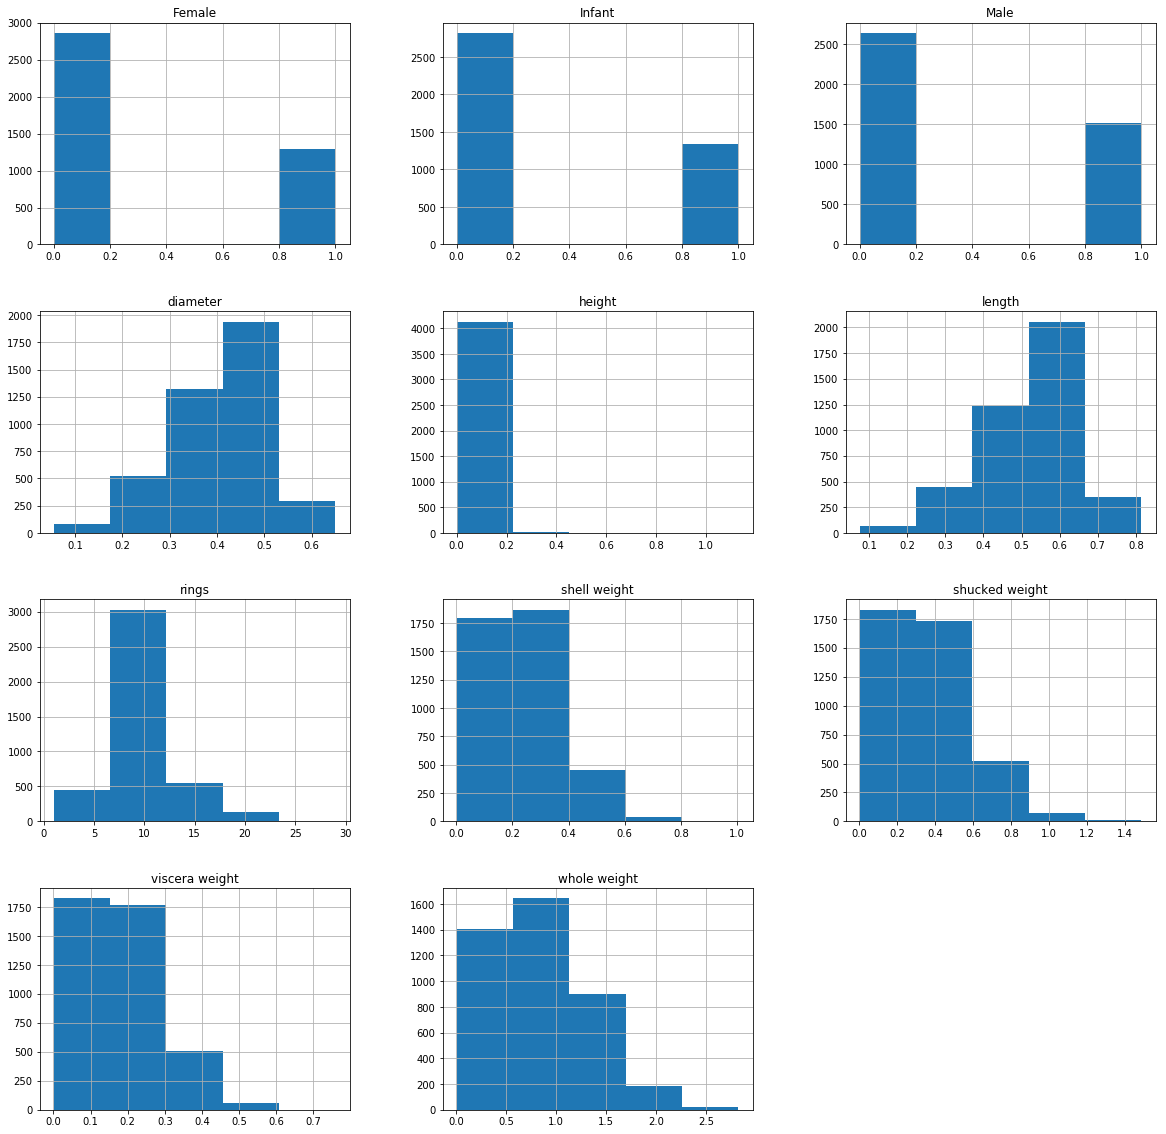

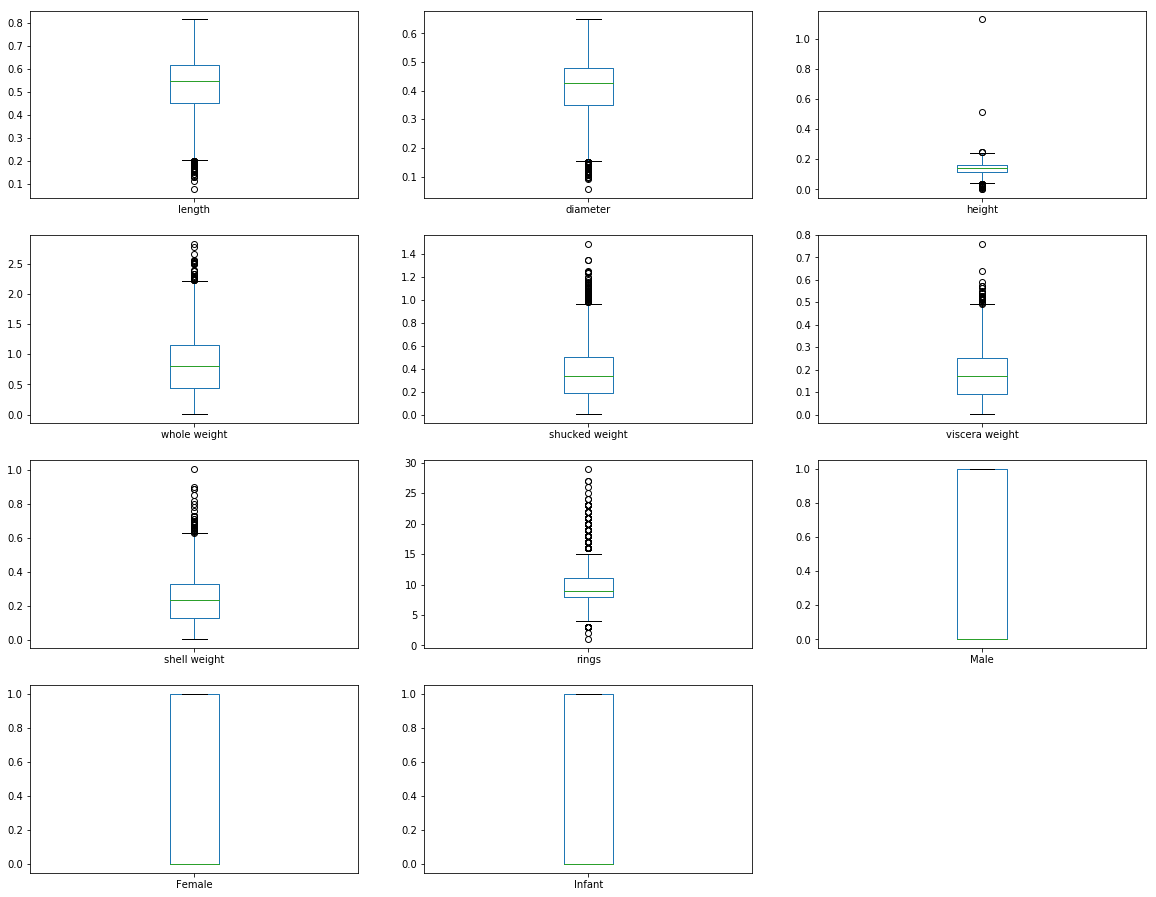

In [33]:
hist = table.hist(bins=5, figsize = (20,20))
# doesn't look like it follows normal distribution - may explain poor performance of nb and the shapes look really weird
# some abalones must have been pretty massive

table.plot(kind='box', subplots=True, layout=(5,3), sharex=False, sharey = False, figsize = (20,20))
plt.show()



http://www.wheres-andy-now.com/10-things-i-learned-about-abalone/
"[abalon] can grow up to 12 inches across"
it should be around ~30 +/- 5 cms should be discarded for impossible

I didn't notice, but the measurement is in mm and 0.1 mm abalone sounds sketchy that's like paper thin. 
realisticly I think the measurement is decimeter or something so largest is 10 cm and smallst is a 1cm
the outliers exists and I think more cleaning is required to get higher accuracy
from box and whisker plot - These data plots show the skew pretty effectively. The weights spreads out as it gets heavier
I don't know the way to fix skew yet.

I will be doing some cluster analysis to better see any potential pattern that may exist in the system.

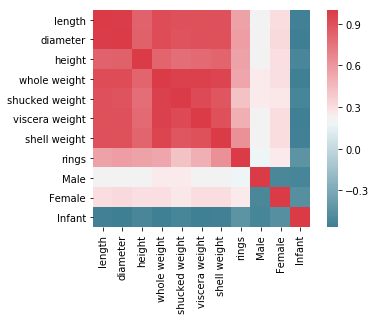

In [34]:

f, ax = plt.subplots()
correlation = table.corr()
sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()


Looking at correlation, for rings, diameter and shell weight had the biggest impact while shucked weight had least
Because I dont know too much about abalones, I did some research on them - eol.org/pages/462648/overview
Based on some domain research, the female abalones can grow larger which accounts for the slightly positive correlation between 
shell weight and female - females have higher upper limit of shell weight resulting in slightly higher average (assuming it follows normal distribution which I ensured)
Male and female has VERY little impact on number of rings so it might be better to just go with is it infant or not, based on the accuracy improvement.

Below there is some collinearity and I believe it results from the height and diameter of the abalone
i.e. height increases -> diameter decreases but weight should remain the same
that'd cause model to have hard time getting the correct coefficients for the feature.

In [8]:
# table  
# = ['length' , 'diameter' , 'height' , 'whole weight' , 'shucked weight' , 'viscera weight' \
#              , 'shell weight' , 'rings', 'Male', 'Female', 'Infant']
feature = table.drop('rings', axis=1)

# feature  
# = ['length' , 'diameter' , 'height' , 'whole weight' , 'shucked weight' , 'viscera weight' \
#              , 'shell weight' , 'Male', 'Female', 'Infant']
label = table.values[:,7] # selected the ring (age of abalone +/- 1.5 years)
feature_train, feature_validation, label_train, label_validation = \
model_selection.train_test_split(feature, label, test_size=0.2)


picked 0.2 (lower than the default 0.25) because I wanted to try to increase the accuracy at the cost of overfitting
I thought since ~0.2 is way too low, overfit wouldn't hurt
it would be better to go at it with a story that has some requirements and restrictions rather than just looking at number
when doing data science problems


In [22]:
'''warning = long computational time for both LR/LDA and SVC'''
# For logistic regression, my sklearn version was 0.20, so lbfgs, which deals with multiclass logistic regression, was used
# Again multinomial was selected because the question wasn't binary (otherwise causes error because 0.20 default is binary)

models = [('LR', LogisticRegression(solver='lbfgs', multi_class= 'multinomial')),('LDA', LinearDiscriminantAnalysis()),\
          ('KNN', KNeighborsClassifier()),('CART',DecisionTreeClassifier()),('NB',GaussianNB()),('SVM', SVC(gamma='auto'))]
results = []
names = []


warnings.simplefilter("ignore") 
# the linear regression wasn't converging and it's likely due to the collinear relationship within the data
# LR shouldn't be taken account due to inconvergence
# collinear error was raised in the LDA, which means there are conflicting features that may cause issues in accuracy of analysis

for name, model in models:
    for i in range(5,20,5):
        # I tried to see what the effect of folds are - with increasing fold, the standard deviation increased
        # Perhaps the kfolds are reducing the sample size too much and from my observation earlier, the features follow normal distribution
        # Therefore, increase in stdev likely occurring from decreasing sample size
        kfold = model_selection.KFold(n_splits = i) 
        cv_results = model_selection.cross_val_score(model, feature_train, label_train, cv = kfold, scoring = 'accuracy')
        results.append(cv_results)
        names.append(name)
        msg = "%s:%f (%f) at %d fold" % (name, cv_results.mean(), cv_results.std(), i)
        print(msg) 
        


LR:0.250526 (0.007280) at 5 fold
LR:0.250223 (0.017716) at 10 fold
LR:0.252625 (0.019239) at 15 fold
LDA:0.256842 (0.007268) at 5 fold
LDA:0.257148 (0.017443) at 10 fold
LDA:0.254137 (0.015001) at 15 fold
KNN:0.231880 (0.010819) at 5 fold
KNN:0.235185 (0.016285) at 10 fold
KNN:0.231563 (0.021902) at 15 fold
CART:0.204511 (0.010110) at 5 fold
CART:0.200299 (0.014536) at 10 fold
CART:0.185259 (0.024191) at 15 fold
NB:0.098947 (0.007079) at 5 fold
NB:0.096534 (0.014397) at 10 fold
NB:0.095323 (0.018246) at 15 fold
SVM:0.231579 (0.006380) at 5 fold
SVM:0.231276 (0.013907) at 10 fold
SVM:0.231879 (0.019806) at 15 fold


Based on this, using 5 fold is the best. More testing can be done to really focus which is the best
This accuracy is quite low. However, it is attributed (in my opinion) to large set of possible class it can fall under
4 being classified as 5 is relatively good classification, but it isn't "accurate" so the machine considers it inaccurate
because there are 1-29 rings (which i think should be an outlier), it's very difficult to accurately pinpoint the actual rings
but seen from the confusion matrix, the model can somewhat classify the instance into close-ish places, although NB was particularly bad

The above and below codes were my attempt to do hyperparameter tuning. I plan on doing the model optimization through grid search and more systematic approach.

Also, I admit that the accuracy metric to optimize this multiclass classification is a pretty bad idea and will be using hamming loss or Jackard similarity for next multiclass iterations and even for binary i will be using more sophisticated metric that better capture the model effectiveness.


In [23]:

'''
models = [('LR', LogisticRegression(solver='lbfgs', multi_class= 'multinomial')),('LDA', LinearDiscriminantAnalysis()),\
          ('KNN', KNeighborsClassifier()),('CART',DecisionTreeClassifier()),('NB',GaussianNB()),('SVM', SVC(gamma='auto'))]

# features are now
# features = ['length' , 'diameter' , 'whole weight' , 'shucked weight' , 'viscera weight' \
#              , 'shell weight' , 'rings', 'Male', 'Female', 'Infant']
results=[]
names = []
#warnings.simplefilter("ignore") # the linear regression wasn't converging and it's likely due to the collinear relationship within the data
# collinear error was raised in the LDA 

for name, model in models:
    for i in range(len(feature.columns)):
        dropped = feature_train.drop(columns= feature.columns[i])
        kfold = model_selection.KFold(n_splits = 5) 
        feature_train, feature_validation, label_train, label_validation = \
model_selection.train_test_split(feature, label, test_size=0.2)
        cv_results = model_selection.cross_val_score(model, dropped, label_train, cv = kfold, scoring = 'accuracy')
        results.append(cv_results)
        names.append(name)
        msg = name, cv_results.mean(), cv_results.std(), i
        print(msg) 
'''

('LR', 0.16300751879699252, 0.012015028183722219, 0)
('LR', 0.15969924812030076, 0.010860433133995666, 1)
('LR', 0.16601503759398495, 0.006962909415212168, 2)
('LR', 0.15849624060150375, 0.011515302086662649, 3)
('LR', 0.15458646616541355, 0.007014678971242469, 4)
('LR', 0.15218045112781953, 0.00675186295357704, 5)
('LR', 0.16601503759398498, 0.004812030075187966, 6)
('LR', 0.1524812030075188, 0.016406835124193515, 7)
('LR', 0.16962406015037595, 0.01832860028293845, 8)
('LR', 0.15578947368421053, 0.009911132062125762, 9)
('LDA', 0.16270676691729324, 0.0075727388342942395, 0)
('LDA', 0.1530827067669173, 0.01477668390560992, 1)
('LDA', 0.15518796992481204, 0.010818710224724783, 2)
('LDA', 0.16180451127819548, 0.009102403579200934, 3)
('LDA', 0.15729323308270676, 0.0045212921438715446, 4)
('LDA', 0.16180451127819548, 0.022718216502882724, 5)
('LDA', 0.1548872180451128, 0.01448612881659224, 6)
('LDA', 0.15969924812030073, 0.009529611740002926, 7)
('LDA', 0.14857142857142855, 0.013260395600

This one is a working code that does the cross validation without the each of the features.
I do not think it's too effective since the accuracy drops significantly but it was an interesting exercise
I did this to see which of the features caused the collinearity and the inconvergence
Not sure if i implemented it correctly though

In [15]:
''' Error causing - doesn't converge '''

lda = LogisticRegression() 
lda.fit(feature_train, label_train) 

predictions_lda = lda.predict(feature_validation) 
print(predictions_lda[:11])
print(label_validation[:11])
# Here I bit off more than i can chew, I'll try to do something else with less features/label classes
print(confusion_matrix(label_validation , predictions_lda, labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]))
# Since 100% F1 score would result in a diagonal line seeing that it somewhat creates a fat diagonal shape is very promising 
# and indicates that the model is in the right direction
print(classification_report(label_validation,predictions_lda))
print("the R2 is ", R2(label_validation, predictions_lda))

[ 8. 10. 11.  9.  9.  9. 10. 10. 10.  8.  7.]
[ 7. 10. 13. 13. 18.  9. 10. 10. 19.  8.  5.]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 12  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 15  6  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16 12 11  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7 17 43 10  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  8 35 52 16  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  7 29 63 37  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5 22 40 50 11  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 11 26 38 21  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  4 16 18  5  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2 10 22  7  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  5 17  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  4 11  7  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  1  4  3  1  0  0  0  0  0 

In [99]:
'''work in progress - to test two labels.

classifier = MLkNN(k=11)
classifier.fit(feature_train, label_train)
predictions_knn = knn.predict(feature_validation)
print(predictions_knn)

'''

'work in progress - to test two labels.\n\nclassifier = MLkNN(k=11)\nclassifier.fit(feature_train, label_train)\npredictions_knn = knn.predict(feature_validation)\nprint(predictions_knn)\n\n'

In [18]:
knn =  KNeighborsClassifier()
knn.fit(feature_train, label_train)
predictions_knn = knn.predict(feature_validation)
print(predictions_knn[:11])
print(label_validation[:11])

print(confusion_matrix(label_validation , predictions_knn, labels=[4,5,6,7,8,9,10,11,12,13,14,15]))
# Cleaner view neglecting "outliers"
print(classification_report(label_validation,predictions_knn))
print("the R2 is ", R2(label_validation, predictions_knn))

[ 8.  9. 12.  7.  9.  9.  9. 11. 13.  8.  6.]
[ 7. 10. 13. 13. 18.  9. 10. 10. 19.  8.  5.]
[[ 6  5  1  0  0  0  0  0  0  0  0  0]
 [ 6  4  9  3  0  0  0  0  0  0  0  0]
 [ 1  7 16 13  5  2  0  0  0  0  0  0]
 [ 0  3 19 27 22  6  1  1  0  0  0  0]
 [ 0  0  6 20 42 27 16  2  0  1  0  0]
 [ 0  1  8  9 28 46 33 10  3  1  0  1]
 [ 0  0  1  6 24 36 38 15  5  1  0  0]
 [ 0  0  0  2 12 33 19 17  7  6  1  0]
 [ 0  0  1  3  6 11 14  5  4  0  0  1]
 [ 0  0  0  1  5  5  9 11  6  1  2  0]
 [ 0  0  0  0  3  4 13  3  1  2  2  0]
 [ 0  0  0  0  2  3  3  9  2  1  1  2]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         3
         4.0       0.38      0.43      0.40        14
         5.0       0.20      0.18      0.19        22
         6.0       0.26      0.36      0.30        44
         7.0       0.31      0.34      0.33        79
         8.0       0.28      0.37      0.32       114
         9.0       0.25      0.33      0.29       140
      

In [19]:
DC = DecisionTreeClassifier()
DC.fit(feature_train, label_train)
predictions_DC = DC.predict(feature_validation)
print(predictions_DC[:11])
print(label_validation[:11])

print(confusion_matrix(label_validation , predictions_DC, labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]))
print(classification_report(label_validation,predictions_DC))
print("the R2 is ", R2(label_validation, predictions_DC))

[ 8.  8. 13. 10. 11.  9. 10. 10. 18.  8.  7.]
[ 7. 10. 13. 13. 18.  9. 10. 10. 19.  8.  5.]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  6  6  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  7  5  3  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  7 12 13  5  4  1  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  3 17 19 22  5  7  3  1  1  0  0  1  0  0]
 [ 0  0  0  0  0  3  6 12 25 22 13 15  6  6  2  2  0  0  0]
 [ 0  0  0  0  0  2  2  8 24 27 36 20  7  2  7  3  0  1  0]
 [ 0  0  0  0  0  0  3  4 14 31 28 16  9  5  5  4  3  2  2]
 [ 0  0  0  0  0  0  0  2 12 18 11 22 10  6  5  5  0  3  1]
 [ 0  0  0  0  0  0  1  0  4  5 11 11  2  3  2  0  3  2  1]
 [ 0  0  0  0  0  0  1  0  1  6  6  4  8  7  5  2  0  1  0]
 [ 0  0  0  0  0  0  0  0  3  2  3  6  5  1  2  4  0  0  0]
 [ 0  0 

In [20]:
nb = GaussianNB() 
nb.fit(feature_train, label_train) 
predictions_nb = nb.predict(feature_validation) 
print(predictions_nb[:21])
print(label_validation[:21])

#The Negative R value can be attributed to the model overestimating the number of rings

print(confusion_matrix(label_validation , predictions_nb, labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]))
print(classification_report(label_validation,predictions_nb))
print("the R2 is ", R2(label_validation, predictions_nb))

# this one is interesting because it's skewed towards right. NB is based on normal distribution, and i might infer that
# the entire dataset is also skewed

[ 7. 22. 23.  7. 22. 22. 23. 23. 23.  6.  5. 22. 22. 23.  7. 23.  4.  7.
 22.  8.  9.]
[ 7. 10. 13. 13. 18.  9. 10. 10. 19.  8.  5.  9.  9.  8.  7. 10.  9.  9.
 10.  8. 17.]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 11  4  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  6  7 14 13  2  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  5 28 27 12  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  1 13 28 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  7 18 22  6  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  4 15  9  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  9  4  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  2  3  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  5  1  0  0  0  0  0

In [39]:
svc = SVC(gamma= 'auto')
svc.fit(feature_train, label_train)
predictions_svc = svc.predict(feature_validation)
print("predictions are " , predictions_svc[:11])
print("Actual numbers  " , label_validation[:11])

print(confusion_matrix(label_validation , predictions_svc, labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]))
print(classification_report(label_validation,predictions_svc))
print("the R2 is ", R2(label_validation, predictions_svc))

predictions are  [ 8. 10. 10. 10. 10.  8.  9. 10.  8. 10.  7.]
Actual numbers   [ 9. 14. 14. 11. 10. 10. 15. 10.  8. 13.  6.]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 27  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 42  5  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 48 15 25  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 19 35 48  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5 26 59 41  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  7 52 52  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3 11 38 40 11  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6 24 20  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

In [21]:
lr = LogisticRegression(solver='lbfgs', multi_class= 'multinomial')
lr.fit(feature_train, label_train)
predictions_lr = lr.predict(feature_validation)
print(predictions_lr[:11])
print(label_validation[:11])

print(confusion_matrix(label_validation , predictions_lr, labels=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]))
print(classification_report(label_validation,predictions_lr))
print("the R2 is ", R2(label_validation, predictions_lr))

[ 8. 10. 11.  9.  9.  9. 10. 10. 10.  8.  6.]
[ 7. 10. 13. 13. 18.  9. 10. 10. 19.  8.  5.]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  5  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 16  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 19 12  7  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14 23 32  9  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4 12 32 48 17  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2 10 26 58 40  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  7 18 37 50 15  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2 11 22 40 22  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  1 17 16  8  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2 10 21  8  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  6 17  5  0  0  0  0  0  0  0]
 [ 0  0 

'''
I think the data set I chose was a little too advanced with too 'multiclass' label for me.

Using lower range class multiclass label will ensure me that I can fully and thoroughly understand if the model is robust

I couldn't really test it with my own data because I'm not really sure what I need to do

I'd like to know what's the ideal accuracy rating (although it probably all depends on the context like this one), I should be striving for 

LR produced the best results, but due to inconvergence, the data set shouldn't use it as an analysis method
LDA was the 2nd best. However, again the collinearity may have influenced the accuracy results

The R2 metric (not 100% sure if it's the right way to implement) is a better metric compared to accuracy for these 
multiclass label problems with large class range, since it calculates how wrong the assumptions are

Again, which one is better would really depend on the context, but if more exact correct guesses are preferred then f1 is favoured
otherwise I'll stick with R2 value.

Overall, knn seems the best way to do this classification

'''